# Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import glob
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data

In [ ]:
# Class labels
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()
y_train = y_train.reshape((50000,))

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
#We rescale the channels to have channel intensities lie from 0 to 1 inclusive

X_train = X_train / 255.0

# Visualization

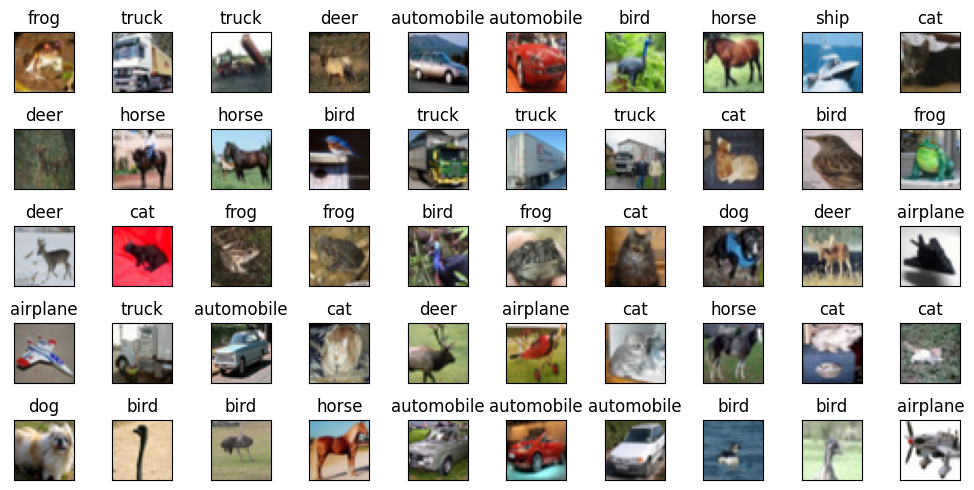

In [ ]:
# To get a sense of the data we work with

plt.rcParams["figure.figsize"] = (10,5)
fig,axes = plt.subplots(5,10)

for i,ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i])
  ax.set_title(f'{CLASS_NAMES[y_train[i]]}')
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()

# Convolutional Neural Network Architecture

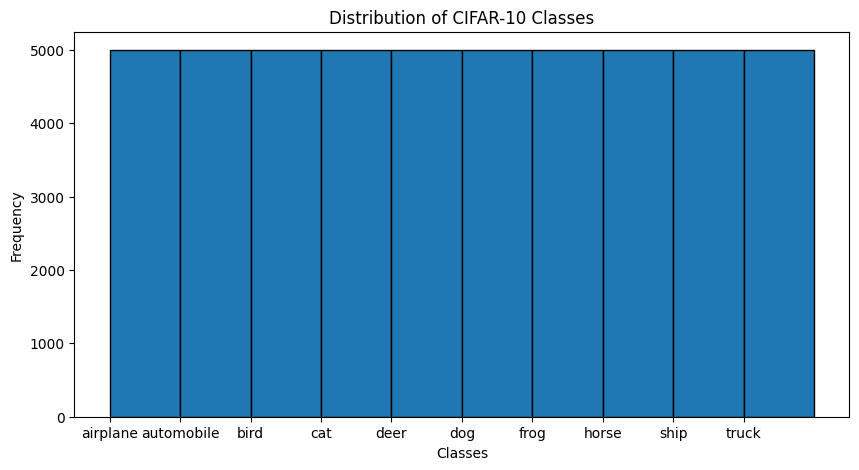

In [ ]:
all_labels = y_train.ravel()

plt.hist(all_labels, bins=10, range=(0, 10), edgecolor='black')
plt.xticks(np.arange(10), CLASS_NAMES)  # Set x-axis ticks to class names
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of CIFAR-10 Classes')
plt.show()

In [ ]:
# CNN model, with 6 convolutional layers, 3 pooling layers, and 3 dense layers. Softmax output layer.
model = models.Sequential()

model.add(layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Augmenting the training data and training the model

In [ ]:
# We augment the training data within the mini-batches to try to reduce generalization error
datagen = ImageDataGenerator(
    horizontal_flip=True,
    channel_shift_range=0.05,
    rotation_range=10,
    validation_split=0.15
)

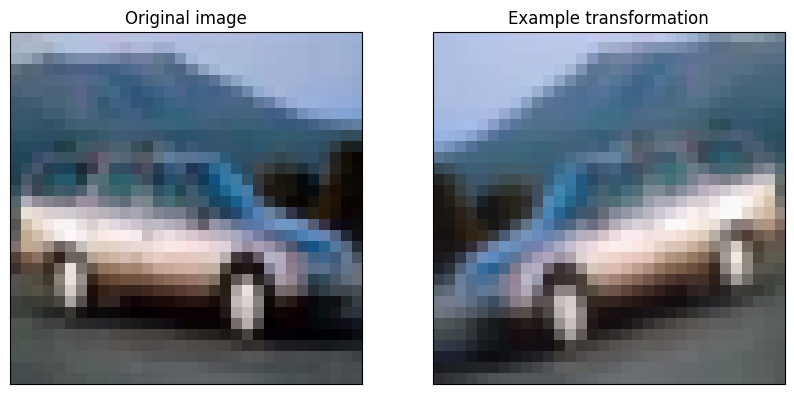

In [ ]:
# An example transformation

img = X_train[4]

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[0].set_title("Original image")
ax[1].imshow(datagen.apply_transform(img,{'theta':-10,'channel_shift_intensity':0.05,'flip_horizontal':True}))
ax[1].set_title("Example transformation")

for i in range(2):
  ax[i].set_xticks([])
  ax[i].set_yticks([])
plt.show()

In [ ]:
# Train the model, including an early stopping if we can't reduce the loss further
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10)

training_flow = datagen.flow(X_train, y_train, subset='training')
validation_flow = datagen.flow(X_train, y_train, subset='validation', shuffle=False)

history = model.fit(training_flow,validation_split=0.1,
                    verbose=1,
                    validation_data=validation_flow,
                    callbacks=[early_stopping],
                    epochs=70)

Epoch 1/70
1329/1329 [==============================] - 76s 56ms/step - loss: 1.8893 - accuracy: 0.2882 - val_loss: 1.5081 - val_accuracy: 0.4376
Epoch 2/70
1329/1329 [==============================] - 76s 58ms/step - loss: 1.3840 - accuracy: 0.4910 - val_loss: 1.2374 - val_accuracy: 0.5517
Epoch 3/70
1329/1329 [==============================] - 75s 57ms/step - loss: 1.1768 - accuracy: 0.5772 - val_loss: 1.1240 - val_accuracy: 0.6051
Epoch 4/70
1329/1329 [==============================] - 76s 57ms/step - loss: 1.0276 - accuracy: 0.6352 - val_loss: 1.0234 - val_accuracy: 0.6353
Epoch 5/70
1329/1329 [==============================] - 75s 56ms/step - loss: 0.9334 - accuracy: 0.6700 - val_loss: 0.9242 - val_accuracy: 0.6769
Epoch 6/70
1329/1329 [==============================] - 75s 56ms/step - loss: 0.8606 - accuracy: 0.6981 - val_loss: 0.9518 - val_accuracy: 0.6689
Epoch 7/70
1329/1329 [==============================] - 74s 56ms/step - loss: 0.8085 - accuracy: 0.7163 - val_loss: 0.8298 -

# Model evaluation

1563/1563 [==============================] - 21s 13ms/step - loss: 0.3040 - accuracy: 0.9081
Test Accuracy : 90.81%


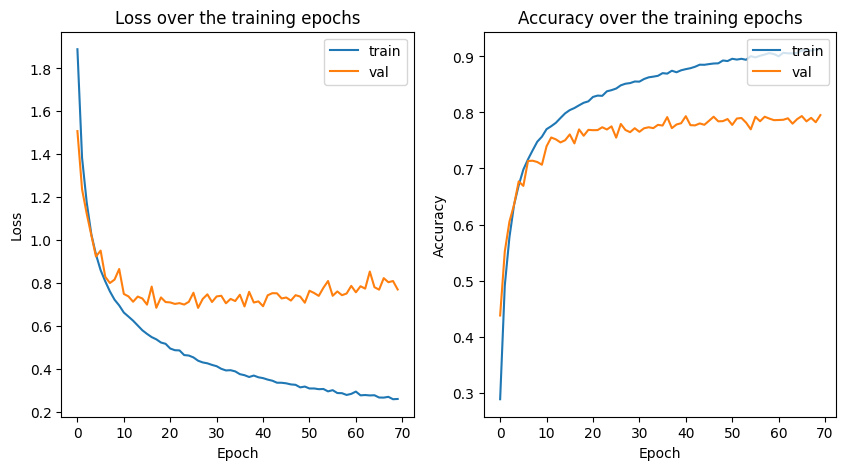

In [ ]:
# Plot the evolution of training/validation error and accuracy
evaluation = model.evaluate(X_train, y_train)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

train_metrics = history.history

fig, ax = plt.subplots(1,2)
ax[0].plot(train_metrics['loss'])
ax[0].plot(train_metrics['val_loss'])
ax[0].legend(['train','val'], loc='upper right')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss over the training epochs")

ax[1].plot(train_metrics['accuracy'])
ax[1].plot(train_metrics['val_accuracy'])
ax[1].legend(['train','val'], loc='upper right')
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy over the training epochs")

plt.show()

1/1 [==============================] - 0s 125ms/step


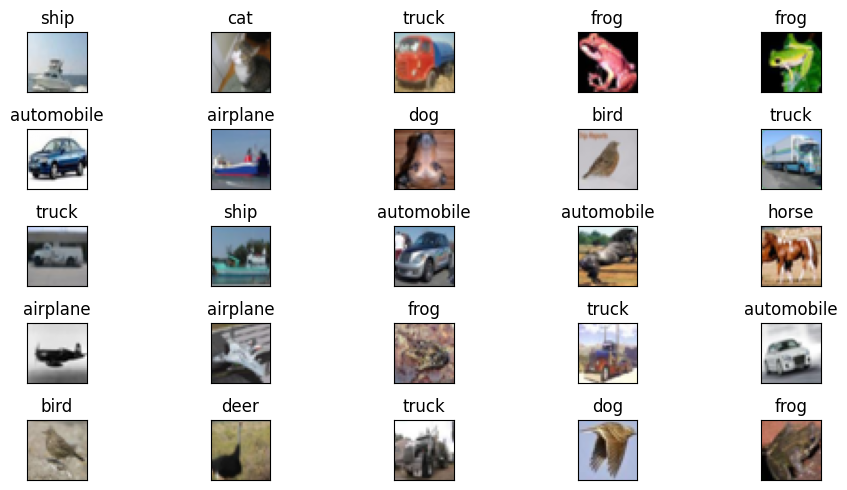

In [ ]:
# Example predictions

sample_set = X_train[100:125]

sample_predictions = np.argmax(model.predict(sample_set),axis=1)

fig,axes = plt.subplots(5,5)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(sample_set[i])
  ax.set_title(f'{CLASS_NAMES[sample_predictions[i]]}')
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()